## Solutions for Module 1 Exercises

In Python there are always many ways of doing the same thing. These solutions are therefore only a suggestion, may not even be the best way. 

In [ ]:
# Exercise 1
import pandas as pd
url = 'https://www.bag.admin.ch/dam/bag/de/dokumente/mt/k-und-i/aktuelle-ausbrueche-pandemien/2019-nCoV/covid-19-datengrundlage-lagebericht.xlsx.download.xlsx/200325_Datengrundlage_Grafiken_COVID-19-Bericht.xlsx' 
dataframe = pd.read_excel(url,sheet_name='COVID19 Zahlen',dtype='str',header=6)
#dataframe.info()
dataframe # default print of first and last rows
#dataframe[10:15]

### Exercise 2

Metadata about the Iris dataset

- See https://archive.ics.uci.edu/ml/datasets/Iris

In [ ]:
# Exercise 3
# Assign NaN to some values and take a look
import numpy as np
df_NaN = pd.read_csv('iris.csv',names=['slength','swidth','plength','pwidth','species'])
df_NaN.iat[39,1],df_NaN.iat[49,1],df_NaN.iat[100,1]=np.NaN,np.NaN,np.NaN
#df_NaN.to_csv('Iris-NaN.csv',na_rep='NaN')
df_NaN[38:50]

In [ ]:
# Read the new file and replace the NaN values with average of the column
#df_NaN.mean()[1]
df_NaN=df_NaN.fillna(df_NaN.mean()[1])
df_NaN[38:41]

In [ ]:
# Exercise 4
url = 'https://www.bag.admin.ch/dam/bag/de/dokumente/mt/k-und-i/aktuelle-ausbrueche-pandemien/2019-nCoV/covid-19-datengrundlage-lagebericht.xlsx.download.xlsx/200325_Datengrundlage_Grafiken_COVID-19-Bericht.xlsx' 
df_cov = pd.read_excel(url,sheet_name='COVID19 Kantone',header=6)
#df_cov.sort_values('Bestätigte Fälle',ascending = False)
df_cov.sort_values('Inzidenz/100 000',ascending = False)

## Following solutions are work in progress

In [ ]:
# Interactive plots
# Package IPYMPL must first be installed, then run
#%matplotlib inline
%matplotlib widget
import matplotlib.pyplot as plt
plt.hist(dataframe['Fallzahlen pro Tag'])
#dataframe['Fallzahlen pro Tag'].hist()
plt.show()

In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import CheckButtons

t = np.arange(0.0, 2.0, 0.01)
s0 = np.sin(2*np.pi*t)
s1 = np.sin(4*np.pi*t)
s2 = np.sin(6*np.pi*t)

fig, ax = plt.subplots()
l0, = ax.plot(t, s0, visible=False, lw=2)
l1, = ax.plot(t, s1, lw=2)
l2, = ax.plot(t, s2, lw=2)
plt.subplots_adjust(left=0.2)

rax = plt.axes([0.05, 0.4, 0.1, 0.15])
check = CheckButtons(rax, ('2 Hz', '4 Hz', '6 Hz'), (False, True, True))


def func(label):
    if label == '2 Hz':
        l0.set_visible(not l0.get_visible())
    elif label == '4 Hz':
        l1.set_visible(not l1.get_visible())
    elif label == '6 Hz':
        l2.set_visible(not l2.get_visible())
    plt.draw()
check.on_clicked(func)

plt.show()

### Plotting Geodata

Often is very nice to visualise data on geographical maps. Fortunately people have written packages helpin us with that. This is an example how the geopandas package can be used. 

You need to install geopandas (via the Anaconda Navigator in the environment you are using. Geopandas is part repository/channel conda-forge). This you may do at home or now or just follow Sigve showing you this example. 

First we need some data files. On Linux or MacOs you can do this in order to hace the files in a subfolder data of your current notebook folder:

>wget http://biogeo.ucdavis.edu/data/diva/adm/CHE_adm.zip
>mkdir -p data
>mv CHE_adm.zip data
>cd data
>unzip CHE_adm.zip

Now we can use this code:

In [3]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime
import os

fp = "data/CHE_adm1.shp"
map_df = gpd.read_file(fp)
cantons_df = pd.read_csv("data/cantons.csv")
#cantons_df
merged_df = map_df.merge(cantons_df, how="left", left_on="NAME_1", right_on="CANTON")
merged_df

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,CANTON,ACR,INHABITANTS,VIRUSCASESCONFIRMED
0,223,CHE,Switzerland,1,Aargau,Canton|Kanton|Chantun,Canton,None,Argovia|Arg¢via|Argovie,"POLYGON ((8.22503 47.61147, 8.22661 47.61130, ...",Aargau,AG,677387,26
1,223,CHE,Switzerland,2,Appenzell Ausserrhoden,Canton|Kanton|Chantun,Canton,None,Appenzell Ausser-Rhoden|Appenzell Outer Rhodes...,"POLYGON ((9.54239 47.47059, 9.54387 47.47031, ...",Appenzell Ausserrhoden,AR,55234,3
2,223,CHE,Switzerland,3,Appenzell Innerrhoden,Canton|Kanton|Chantun,Canton,None,Appenzell Inner-Rhoden|Appenzell Inner Rhodes|...,"MULTIPOLYGON (((9.37930 47.38512, 9.37944 47.3...",Appenzell Innerrhoden,AI,16145,0
3,223,CHE,Switzerland,4,Basel-Landschaft,Canton|Kanton|Chantun,Canton,None,Bâle-Campagne|Basel-Country|Baselland|Basel-La...,"MULTIPOLYGON (((7.38339 47.41924, 7.38057 47.4...",Basel-Landschaft,BL,288132,41
4,223,CHE,Switzerland,5,Basel-Stadt,Canton|Kanton|Chantun,Canton,None,Bâle-Ville|Basel-City|Basel-Town|Basilea-Citad...,"POLYGON ((7.67336 47.58182, 7.67500 47.57977, ...",Basel-Stadt,BS,194766,100
5,223,CHE,Switzerland,6,Bern,Canton|Kanton|Chantun,Canton,None,Berna|Berne,"MULTIPOLYGON (((7.09284 46.89419, 7.09202 46.8...",Bern,BE,1034977,69
6,223,CHE,Switzerland,7,Fribourg,Canton|Kanton|Chantun,Canton,None,Freiburg|Friburg|Friburgo,"MULTIPOLYGON (((6.78581 46.74974, 6.78684 46.7...",Fribourg,FR,318714,31
7,223,CHE,Switzerland,8,Genève,Canton|Kanton|Chantun,Canton,None,Cenevre|Genebra|Geneve|Geneva|Genevra|Genf|Gin...,"MULTIPOLYGON (((6.18406 46.34775, 6.18559 46.3...",Genève,GE,499480,103
8,223,CHE,Switzerland,9,Glarus,Canton|Kanton|Chantun,Canton,None,Glaris|Glarona|Glaruna,"POLYGON ((9.07083 47.13050, 9.07307 47.12995, ...",Glarus,GL,40403,3
9,223,CHE,Switzerland,10,Graubünden,Canton|Kanton|Chantun,Canton,None,Graubünden|Grigioni|Grischun|Grisons,"MULTIPOLYGON (((10.22766 46.61207, 10.22734 46...",Graubünden,GR,198379,43


   ACR  VIRUSCASESDENSITY
0   AG           0.003838
1   AR           0.005431
2   AI           0.000000
3   BL           0.014230
4   BS           0.051344
5   BE           0.006667
6   FR           0.009727
7   GE           0.020621
8   GL           0.007425
9   GR           0.021676
10  JU           0.009534
11  LU           0.002197
12  NE           0.021487
13  NW           0.000000
14  OW           0.002643
15  SG           0.003151
16  SH           0.001220
17  SZ           0.007539
18  SO           0.002196
19  TG           0.001447
20  TI           0.070753
21  UR           0.000000
22  VS           0.012502
23  VD           0.031784
24  ZH           0.007824
25  ZG           0.006307


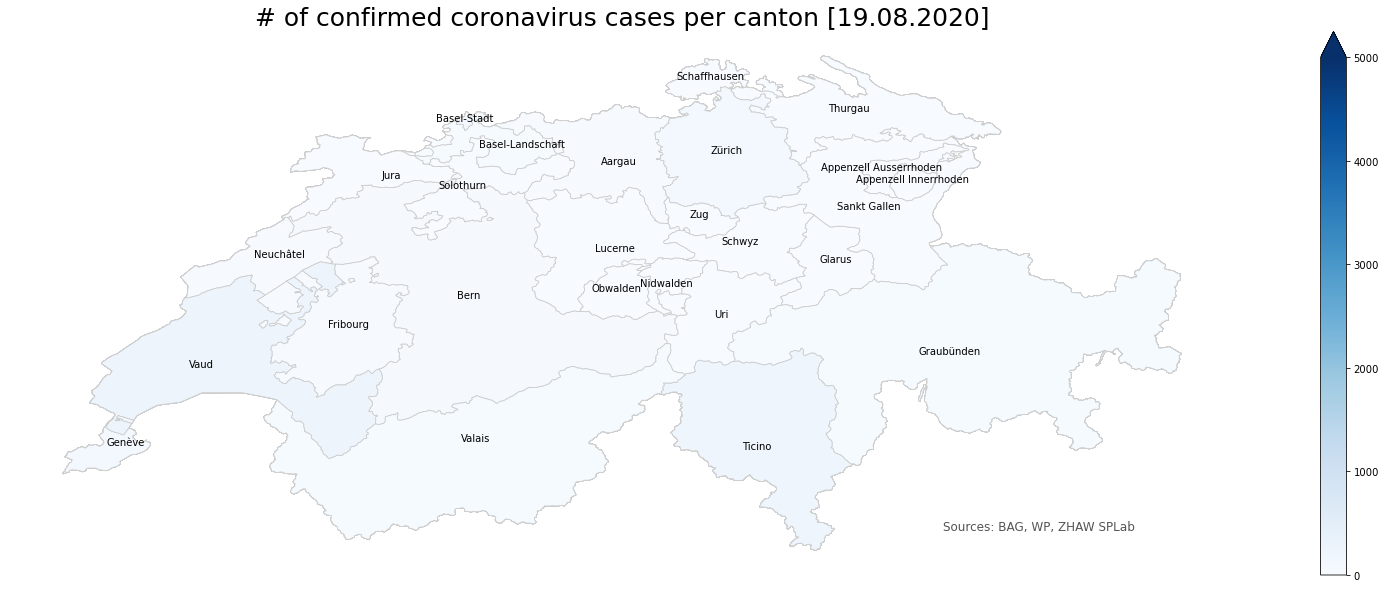

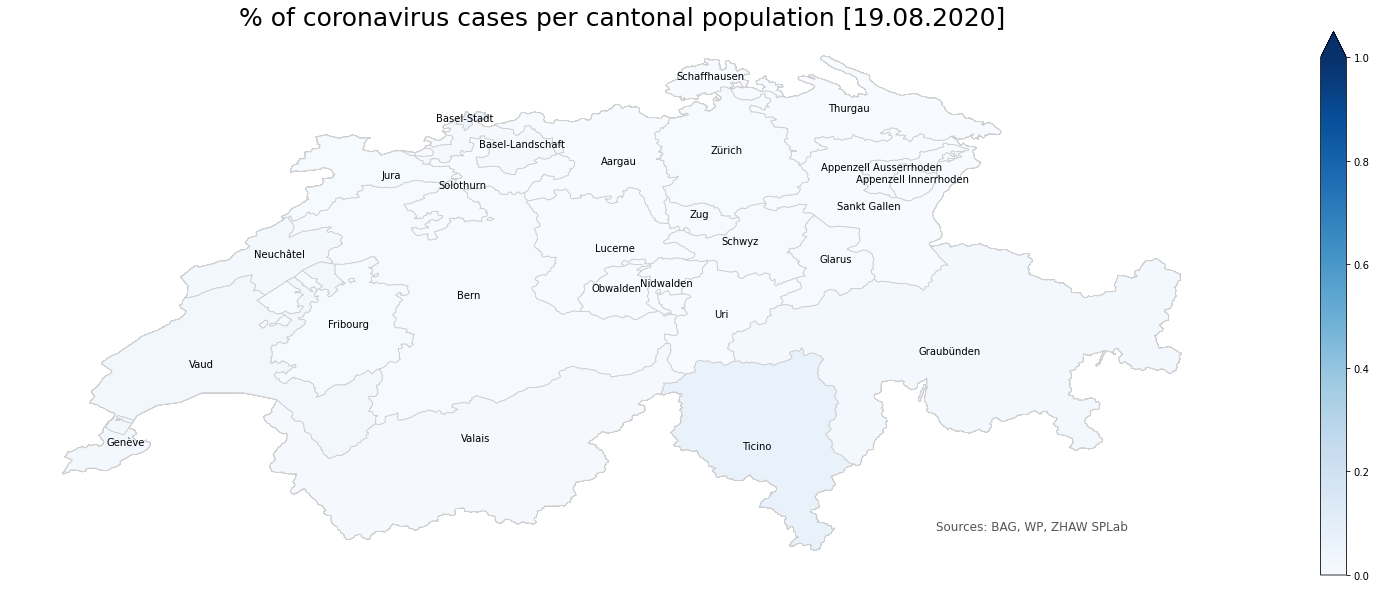

In [4]:
def plotmap(df, datacol, vmax, filename, title):
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=vmax))
    fig, ax = plt.subplots(1, figsize=(30, 10))
    ax.axis("off") 
    ax.set_title(title, fontdict={'fontsize': '25', 'fontweight' : '3'}) 
    ax.annotate("Sources: BAG, WP, ZHAW SPLab", xy=(0.68, 0.11), 
    xycoords='figure fraction', fontsize=12, color='#555555')
    sm.set_array([])
    fig.colorbar(sm, ax=ax, extend="max")
    df['coords'] = df['geometry'].apply(lambda x: x.representative_point().coords[:]) 
    df['coords'] = [coords[0] for coords in df['coords']]
    for idx, row in df.iterrows():
        plt.annotate(s=row['NAME_1'], xy=row['coords'],horizontalalignment='center') 
        df.plot(column=datacol, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', vmax=vmax) 
    fig.savefig(filename, dpi=150)

merged_df["VIRUSCASESDENSITY"] = 100 * merged_df["VIRUSCASESCONFIRMED"] / merged_df["INHABITANTS"]
print(merged_df[["ACR", "VIRUSCASESDENSITY"]])
if not os.path.isfile("map_absolute.png"):
    plotmap(merged_df, "VIRUSCASESCONFIRMED", 500, "map_absolute.png", "# of confirmed coronavirus cases per canton")
    plotmap(merged_df, "VIRUSCASESDENSITY", 0.1, "map_density.png", "% of coronavirus cases per cantonal population")

os.makedirs("dailymaps", exist_ok=True)
stamp = datetime.datetime.now().strftime("%Y%m%d")
hdate = datetime.datetime.now().strftime("%d.%m.%Y")

plotmap(merged_df, "VIRUSCASESCONFIRMED", 5000, f"dailymaps/map_abs_{stamp}.png", f"# of confirmed coronavirus cases per canton [{hdate}]")
plotmap(merged_df, "VIRUSCASESDENSITY", 1, f"dailymaps/map_den_{stamp}.png", f"% of coronavirus cases per cantonal population [{hdate}]")

In [ ]:
import mysql.connector
import pandas as pd 
my_connect = mysql.connector.connect(
      host="localhost",
      user="userid",
      passwd="******",
      database="my_tutorial"
    )
####### end of connection ####
my_data = pd.read_sql("SELECT * FROM student WHERE class='four'",my_connect)
print(my_data)